In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import datetime
import seaborn as sns
female_literacy_fertility = pd.read_csv('female_literacy_fertility.csv')
literacy = female_literacy_fertility.iloc[1:,2].values
illiteracy = 100 - literacy
fertility = female_literacy_fertility.iloc[1:,3].values
sns.set_theme()
wd=os.getcwd()
os.listdir(wd)
nohitter_times = np.array([843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545, 715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,876,  381,  905,  156,  419,  239,  119,  129,  467])

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)
    # Return entry [0,1]
    return corr_mat[0,1]

In [2]:
weather = pd.read_csv('sheffield_weather_station.csv',header=8,delim_whitespace=True)
weather.columns=['year','month','Max Temp Cel.','Min Temp Cel.','Airfrost','Rain','Sun Hours']
yearly_weather = weather.groupby('year').sum()
rainfall = yearly_weather.loc[1:,'Rain'].values

# Visualizing bootstrap samples
In this exercise, you will generate bootstrap samples from the set of annual rainfall data measured at the Sheffield Weather Station in the UK from 1883 to 2015. The data are stored in the NumPy array rainfall in units of millimeters (mm). By graphically displaying the bootstrap samples with an ECDF, you can get a feel for how bootstrap sampling allows probabilistic descriptions of data.

Instructions
0 XP
Write a for loop to acquire 50 bootstrap samples of the rainfall data and plot their ECDF.
Use np.random.choice() to generate a bootstrap sample from the NumPy array rainfall. Be sure that the size of the resampled array is len(rainfall).
Use the function ecdf() that you wrote in the prequel to this course to generate the x and y values for the ECDF of the bootstrap sample bs_sample.
Plot the ECDF values. Specify color='gray' (to make gray dots) and alpha=0.1 (to make them semi-transparent, since we are overlaying so many) in addition to the marker='.' and linestyle='none' keyword arguments.
Use ecdf() to generate x and y values for the ECDF of the original rainfall data available in the array rainfall.
Plot the ECDF values of the original data.
Hit submit to visualize the samples!

Hint
Inside the for loop:
Use np.random.choice() with rainfall and size=len(rainfall) as the arguments.
Use the ecdf() function on bs_sample to generate the x and y values.
Plot x and y using plt.plot() and specify marker='.', linestyle='none', color='gray', and alpha=0.1.
Compute the ECDF of the original data just as you did with the bootstrap samples, using the ecdf() function on rainfall. To plot them, pass in x and y as arguments to plt.plot() and specify the marker parameter

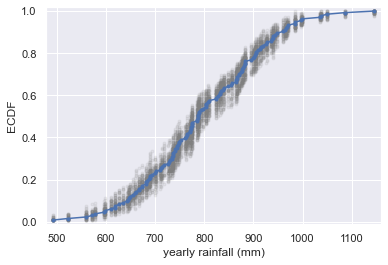

In [3]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

# 1. Bootstrap confidence intervals
In the last video, we learned how to take a set of data, create a bootstrap sample, and then compute a bootstrap replicate of a given statistic. Since we will repeat the replicates over and over again, we can write a function to generate a bootstrap replicate.

2. Bootstrap replicate function
We will call the function bootstrap_replicate_1d, since it works on one-dimensional arrays. We pass in the data and also a function that computes the statistic of interest. We could pass np dot mean or np dot median, for example. Generating a replicate takes two steps. First, we choose entries out of the data array so that the bootstrap sample has the same number of entries as the original data. Then, we compute the statistic using the specified function. If we call the function, we get a bootstrap replicate. And we can do this over and over again. So, how do we do it over and over again?

3. Many bootstrap replicates
With a for loop! First, we have to initialize an array to store our bootstrap replicates. We will make 10,000 replicates, so we use np dot empty to create an empty array. Next, we write a for loop to generate a replicate and store it in the bs_replicates array. Now that we have the replicates,

4. Plotting a histogram of bootstrap replicates
we can make a histogram to see what we might expect to get for the mean of repeated measurements of the speed of light. Note that we use the normed equals True keyword argument. This sets the height of the bars of the histogram such that the total area of the bars is equal to one. This is called

5. Bootstrap estimate of the mean
normalization, and we do it so that the histogram approximates a probability density function. You'll recall from the prequel to this course that the area under the PDF gives a probability. So, we have computed the approximate PDF of the mean speed of light we would expect to get if we performed the measurements again. Now we're thinking probabilistically! If we repeat the experiment again and again, we are likely to only see the sample mean vary by about 30 km/s. Now it is useful to summarize this result without having to resort to a graphical method like a histogram. To do this,

6. Confidence interval of a statistic
we will compute the 95% confidence interval of the mean. The p% confidence interval is defined as follows. If we repeated measurements over and over again, p% of the observed values would lie within the p% confidence interval. In our case, if we repeated the 100 measurements of the speed of light over and over again, 95% of the sample means would lie within the 95% confidence interval.

7. Bootstrap confidence interval
By doing bootstrap replicas, we just "repeated" the experiment over and over again. So, we just use np dot percentile to compute the 2-point-5th and 97-point-5th percentiles to get the 95% confidence interval. This is indeed commensurate with what we see in the histogram.

8. Let's practice!
Now it's time for you get some of your own bootstrap confidence intervals.

# Generating many bootstrap replicates
The function bootstrap_replicate_1d() from the video is available in your namespace. Now you'll write another function, draw_bs_reps(data, func, size=1), which generates many bootstrap replicates from the data set. This function will come in handy for you again and again as you compute confidence intervals and later when you do hypothesis tests.

For your reference, the bootstrap_replicate_1d() function is provided below:

`def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)`

Instructions


Define a function with call signature draw_bs_reps(data, func, size=1).

Using np.empty(), initialize an array called bs_replicates of size size to hold all of the bootstrap replicates.

Write a for loop that ranges over size and computes a replicate using bootstrap_replicate_1d(). Refer to the exercise description above to see the function signature of bootstrap_replicate_1d(). Store the replicate in the appropriate index of bs_replicates.

Return the array of replicates bs_replicates. This has already been done for you.

In [4]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)
    return bs_replicates



# Bootstrap replicates of the mean and the SEM
In this exercise, you will compute a bootstrap estimate of the probability density function of the mean annual rainfall at the Sheffield Weather Station. Remember, we are estimating the mean annual rainfall we would get if the Sheffield Weather Station could repeat all of the measurements from 1883 to 2015 over and over again. This is a probabilistic estimate of the mean. You will plot the PDF as a histogram, and you will see that it is Normal.

In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the mean will always be Normally distributed. (This does not hold in general, just for the mean and a few other statistics.) The standard deviation of this distribution, called the standard error of the mean, or SEM, is given by the standard deviation of the data divided by the square root of the number of data points. I.e., for a data set, sem = np.std(data) / np.sqrt(len(data)). Using hacker statistics, you get this same result without the need to derive it, but you will verify this result from your bootstrap replicates.

The dataset has been pre-loaded for you into an array called rainfall.

Instructions
100 XP
Draw 10000 bootstrap replicates of the mean annual rainfall using your draw_bs_reps() function and the rainfall array. Hint: Pass in np.mean for func to compute the mean.
As a reminder, draw_bs_reps() accepts 3 arguments: data, func, and size.
Compute and print the standard error of the mean of rainfall.
The formula to compute this is np.std(data) / np.sqrt(len(data)).
Compute and print the standard deviation of your bootstrap replicates bs_replicates.
Make a histogram of the replicates using the normed=True keyword argument and 50 bins.
Hit submit to see the plot

10.635458130769608
10.666124807248822


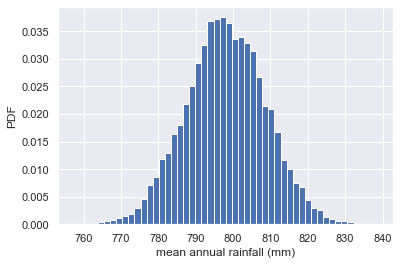

In [5]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall,np.mean,10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

# Confidence intervals of rainfall data
A confidence interval gives upper and lower bounds on the range of parameter values you might expect to get if we repeat our measurements. For named distributions, you can compute them analytically or look them up, but one of the many beautiful properties of the bootstrap method is that you can take percentiles of your bootstrap replicates to get your confidence interval. Conveniently, you can use the np.percentile() function.

Use the bootstrap replicates you just generated to compute the 95% confidence interval. That is, give the 2.5th and 97.5th percentile of your bootstrap replicates stored as bs_replicates. What is the 95% confidence interval?

In [6]:
print(np.percentile(bs_replicates,97.5))
print(np.percentile(bs_replicates,2.5))

818.8263992537313
777.161865671642


# Bootstrap replicates of other statistics
We saw in a previous exercise that the mean is Normally distributed. This does not necessarily hold for other statistics, but no worry: as hackers, we can always take bootstrap replicates! In this exercise, you'll generate bootstrap replicates for the variance of the annual rainfall at the Sheffield Weather Station and plot the histogram of the replicates.

Here, you will make use of the draw_bs_reps() function you defined a few exercises ago. It is provided below for your reference:

`def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates`
    
Instructions
100 XP

Draw 10000 bootstrap replicates of the variance in annual rainfall, stored in the rainfall dataset, using your draw_bs_reps() function. Hint: Pass in np.var for computing the variance.

Divide your variance replicates (bs_replicates) by 100 to put the variance in units of square centimeters for convenience.

Make a histogram of bs_replicates using the normed=True keyword argument and 50 bins.

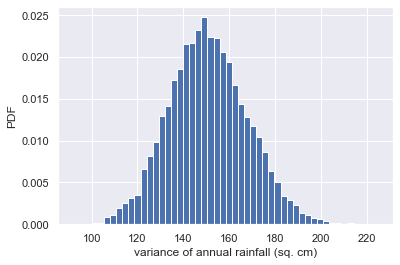

In [7]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall,np.var,10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates/100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins = 50, density = True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


# Confidence interval on the rate of no-hitters
Consider again the inter-no-hitter intervals for the modern era of baseball. Generate 10,000 bootstrap replicates of the optimal parameter . Plot a histogram of your replicates and report a 95% confidence interval.

Instructions
70 XP
Generate 10000 bootstrap replicates of  from the nohitter_times data using your draw_bs_reps() function. Recall that the optimal  is calculated as the mean of the data.
Compute the 95% confidence interval using np.percentile() and passing in two arguments: The array bs_replicates, and the list of percentiles - in this case 2.5 and 97.5.
Print the confidence interval.
Plot a histogram of your bootstrap replicates. This has been done for you, so hit submit to see the plot!


Show Answer (-70 XP)
Hint
Use your draw_bs_reps() function similar to when you were asked to draw replicates of the mean annual rainfall. Here,  is the same as np.mean.
Be sure to pass in the 2.5th and 97.5th percentiles of bs_replicates in the form of a list ([2.5, 97.5]) as arguments to np.percentile().
Print the confidence interval you calculated above by passing in conf_int as an argument to the provided print() function.
Make sure all required arguments are provided inside plt.hist(), and hit submit to view your plot!

95% confidence interval = [662.17749004 869.97808765] games


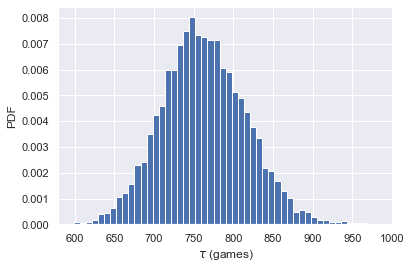

In [8]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times,np.mean,10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates,[2.5,97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

# 1. Pairs bootstrap
When we computed bootstrap confidence intervals on summary statistics, we did so

2. Nonparametric inference
nonparametrically. By this, I mean that we did not assume any model underlying the data; the estimates were done using the data alone.

3. 2008 US swing state election results
When we performed a linear least squares regression, however, we were using a linear model, which has two parameters, the slope and intercept. This was a parametric estimate. The optimal parameter values we compute for our parametric model are like other statistics, in that we would get different values for them if we acquired the data again. We can perform bootstrap estimates to get confidence intervals on the slope and intercept as well. Remember: we need to think probabilistically. Let's consider the swing state election data from the prequel to this course. What if we had the election again, under identical conditions? How would the slope and intercept change? This is kind of a tricky question; there are several ways to get bootstrap estimates of the confidence intervals on these parameters, each of which makes difference assumptions about the data. We will do a method that makes the least assumptions,

1 Data retrieved from Data.gov (https://www.data.gov/)
4. Pairs bootstrap for linear regression
called pairs bootstrap. Since we cannot resample individual data because each county has two variables associated with it, the vote share for Obama and the total number of votes, we resample pairs. For the election data, we could randomly select a given county, and keep its total votes and Democratic share as a pair. So our bootstrap sample consists of a set (x,y) pairs. We then compute the slope and intercept from this pairs bootstrap sample to get the bootstrap replicates. You can get confidence intervals from many bootstrap replicates of the slope and intercept, just like before. Let's see how this works in practice.

5. Generating a pairs bootstrap sample
Because np dot random dot choice must sample a 1D array, we will sample the indices of the data points. We can generate the indices of a NumPy array using the np dot arrange function. It give us an array of sequential integers. We then sample the indices with replacement. The bootstrap sample is generated by slicing out the respective values from the original data arrays. With these in hand,

6. Computing a pairs bootstrap replicate
we can perform a linear regression using np dot polyfit on the pairs bootstrap sample to get a bootstrap replicate. If we compare the result to the linear regression on the original data, they are close, but not equal. As we have seen before, you can use many of these replicates to generate bootstrap confidence intervals for the slope and intercept using np dot percentile. You can also

7. 2008 US swing state election results
plot the lines you get from your bootstrap replicates to get a graphic idea how the regression line may change if the data were collected again. You will work through this whole procedure in the exercises.

1 Data retrieved from Data.gov (https://www.data.gov/)
8. Let's practice!
When you do, always keep in mind that you are thinking probabilistically. Getting an optimal parameter value is the first step. Now, you are finding out how that parameter is likely to change upon repeated measurements. Happy coding!

# A function to do pairs bootstrap
As discussed in the video, pairs bootstrap involves resampling pairs of data. Each collection of pairs fit with a line, in this case using np.polyfit(). We do this again and again, getting bootstrap replicates of the parameter values. To have a useful tool for doing pairs bootstrap, you will write a function to perform pairs bootstrap on a set of x,y data.

Instructions
0 XP
Define a function with call signature draw_bs_pairs_linreg(x, y, size=1) to perform pairs bootstrap estimates on linear regression parameters.
Use np.arange() to set up an array of indices going from 0 to len(x). These are what you will resample and use them to pick values out of the x and y arrays.
Use np.empty() to initialize the slope and intercept replicate arrays to be of size size.
Write a for loop to:
Resample the indices inds. Use np.random.choice() to do this.
Make new  and  arrays bs_x and bs_y using the the resampled indices bs_inds. To do this, slice x and y with bs_inds.
Use np.polyfit() on the new  and  arrays and store the computed slope and intercept.
Return the pair bootstrap replicates of the slope and intercept.

Hint
The function signature has been written for you. To use np.arange() to set up an array of indices, pass in the desired length of the array (len(x)) as an argument to np.arange().
Initialize the slope and intercept replicate arrays with np.empty(). Make sure they accept the argument size.
To resample the indices, use np.random.choice() with inds and size=len(inds) as arguments.
To make the new arrays bs_x and bs_y using the resampled indices bs_inds, you need to slice x and y like so: x[bs_inds] and y[bs_inds].
Use np.polyfit() on bs_x and bs_y and remember to include 1 as an argument!

In [9]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps


# Pairs bootstrap of literacy/fertility data
Using the function you just wrote, perform pairs bootstrap to plot a histogram describing the estimate of the slope from the illiteracy/fertility data. Also report the 95% confidence interval of the slope. The data is available to you in the NumPy arrays illiteracy and fertility.

As a reminder, draw_bs_pairs_linreg() has a function signature of draw_bs_pairs_linreg(x, y, size=1), and it returns two values: bs_slope_reps and bs_intercept_reps.

Instructions
0 XP
Use your draw_bs_pairs_linreg() function to take 1000 bootstrap replicates of the slope and intercept. The x-axis data is illiteracy and y-axis data is fertility.
Compute and print the 95% bootstrap confidence interval for the slope.
Plot and show a histogram of the slope replicates. Be sure to label your axes. This has been done for you, so click submit to see your histogram!

Hint
Use the draw_bs_pairs_linreg() function to generate replicates of the slope and intercept. Recall from the previous exercise that the function takes 3 arguments: x, y, and size.
Use np.percentile() to calculate the 95% confidence interval for the slope. Recall that this means you have to pass in the 2.5th and 97.5th percentiles of bs_slope_reps in the form of a list ([2.5, 97.5]) as arguments to np.percentile().

[0.0446335  0.05505227]


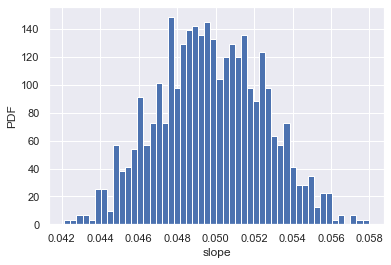

In [11]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(
                    illiteracy, fertility, size=1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, density=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

# Plotting bootstrap regressions
A nice way to visualize the variability we might expect in a linear regression is to plot the line you would get from each bootstrap replicate of the slope and intercept. Do this for the first 100 of your bootstrap replicates of the slope and intercept (stored as bs_slope_reps and bs_intercept_reps).

Instructions
0 XP
Generate an array of -values consisting of 0 and 100 for the plot of the regression lines. Use the np.array() function for this.
Write a for loop in which you plot a regression line with a slope and intercept given by the pairs bootstrap replicates. Do this for 100 lines.
When plotting the regression lines in each iteration of the for loop, recall the regression equation y = a*x + b. Here, a is bs_slope_reps[i] and b is bs_intercept_reps[i].
Specify the keyword arguments linewidth=0.5, alpha=0.2, and color='red' in your call to plt.plot().
Make a scatter plot with illiteracy on the x-axis and fertility on the y-axis. Remember to specify the marker='.' and linestyle='none' keyword arguments.
Label the axes, set a 2% margin, and show the plot. This has been done for you, so hit submit to visualize the bootstrap regressions!

Hint
To generate an array of -values consisting of 0 and 100, use np.array([0,100]).
You need your for loop to have 100 iterations. This can be specified with range(100). Inside the loop, the first argument to plt.plot() is x, and the second is given by the regression equation: y = a*x + b. Here, the slope (x) is bs_slope_reps[i] and the intercept (b) is bs_intercept_reps[i]. Remember to also include the keyword arguments linewidth-0.5, alpha=0.2, and color='red' inside plt.plot().

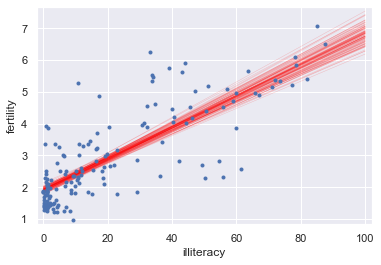

In [17]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i] * x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()